In [1]:
# Do the various criteria for success (critic reviews, audience reviews, profit/loss) correlate with each other?
# Is there something you can say about better or worse kinds of “success”? 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
roto = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
roto = roto.drop(['imdb_id'],axis=1)  # Only need one ID
roto = roto.dropna(how = 'any')
roto = roto[roto['audience_ratings']>1000].set_index('rotten_tomatoes_id')

## Scatter Plot of Every Two Variables

In [3]:
# plt.scatter(roto['audience_average'],roto['audience_percent'])  # strong positive trend
# plt.scatter(roto['audience_average'],roto['audience_ratings'])  # no relationship
# plt.scatter(roto['audience_average'],roto['critic_average'])    # positive trend
# plt.scatter(roto['audience_average'],roto['critic_percent'])    # weak positive trend
# plt.scatter(roto['audience_percent'],roto['audience_ratings'])  # no relationship
# plt.scatter(roto['audience_percent'],roto['critic_average'])    # positive trend
# plt.scatter(roto['audience_percent'],roto['critic_percent'])    # positive trend
# plt.scatter(roto['audience_ratings'],roto['critic_average'])    # no relationship
# plt.scatter(roto['audience_ratings'],roto['critic_percent'])    # no relationship
# plt.scatter(roto['critic_average'],roto['critic_percent'])      # strong positive trend

## Correlation Coefficients for Every Pair of Variables

In [4]:
roto.corr()

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent
audience_average,1.000000,0.923463,-0.009852,0.721452,0.684537
audience_percent,0.923463,1.000000,0.014555,0.740508,0.715635
audience_ratings,-0.009852,0.014555,1.000000,0.022891,0.013171
critic_average,0.721452,0.740508,0.022891,1.000000,0.950125
critic_percent,0.684537,0.715635,0.013171,0.950125,1.000000


## 6 Linear Regression (excluding audience_ratings)

## OLS Test (audience_average vs critic_average)

The slope of the regression line is :  2.3604158660962664
The intercept of the regression line is :  -1.9672991648044649
The p-value for regression line is :   0.0
The p value of the residual normaltest :  1.3406855895259903e-117


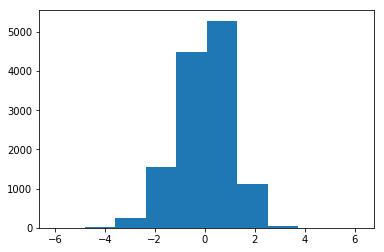

In [5]:
x = roto['audience_average']
y = roto['critic_average']

regression = stats.linregress(x, y)

print("The slope of the regression line is : ", regression.slope)
print("The intercept of the regression line is : ", regression.intercept)
print("The p-value for regression line is :  ", regression.pvalue)

#calculate residual and draw histogram
roto['prediction'] = x *regression.slope + regression.intercept
roto['residual'] = y - roto['prediction']
print("The p value of the residual normaltest : ", stats.normaltest(roto['residual']).pvalue)
plt.hist(roto['residual'])
plt.show()

## OLS Test (audience_percent vs critic_percent)

The slope of the regression line is :  1.022088989740803
The intercept of the regression line is :  -3.342211824871491
The p-value for regression line is :   0.0
The p value of the residual normaltest :  1.464231160581152e-110


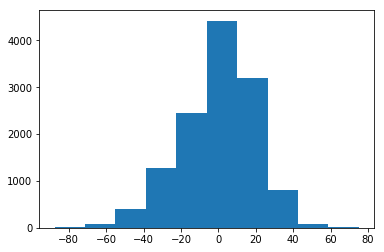

In [6]:
x = roto['audience_percent']
y = roto['critic_percent']

regression = stats.linregress(x, y)

print("The slope of the regression line is : ", regression.slope)
print("The intercept of the regression line is : ", regression.intercept)
print("The p-value for regression line is :  ", regression.pvalue)

#calculate residual and draw histogram
roto['prediction'] = x *regression.slope + regression.intercept
roto['residual'] = y - roto['prediction']
print("The p value of the residual normaltest : ", stats.normaltest(roto['residual']).pvalue)
plt.hist(roto['residual'])
plt.show()

## OLS Test (audience_average vs critic_percent)

The slope of the regression line is :  41.969073395738306
The intercept of the regression line is :  -80.89407389758651
The p-value for regression line is :   0.0
The p value of the residual normaltest :  3.663958014754516e-96


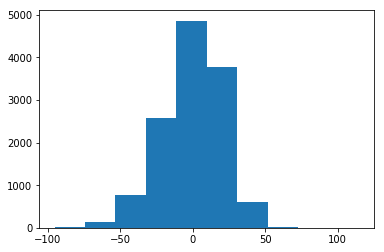

In [7]:
x = roto['audience_average']
y = roto['critic_percent']

regression = stats.linregress(x, y)

print("The slope of the regression line is : ", regression.slope)
print("The intercept of the regression line is : ", regression.intercept)
print("The p-value for regression line is :  ", regression.pvalue)

#calculate residual and draw histogram
roto['prediction'] = x *regression.slope + regression.intercept
roto['residual'] = y - roto['prediction']
print("The p value of the residual normaltest : ", stats.normaltest(roto['residual']).pvalue)
plt.hist(roto['residual'])
plt.show()

## OLS Test (audience_percent vs critic_average)

The slope of the regression line is :  0.05643850346386594
The intercept of the regression line is :  2.459987234163385
The p-value for regression line is :   0.0
The p value of the residual normaltest :  8.070356129378528e-134


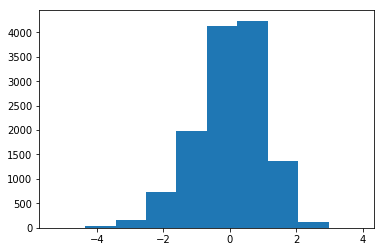

In [8]:
x = roto['audience_percent']
y = roto['critic_average']

regression = stats.linregress(x, y)

print("The slope of the regression line is : ", regression.slope)
print("The intercept of the regression line is : ", regression.intercept)
print("The p-value for regression line is :  ", regression.pvalue)

#calculate residual and draw histogram
roto['prediction'] = x *regression.slope + regression.intercept
roto['residual'] = y - roto['prediction']
print("The p value of the residual normaltest : ", stats.normaltest(roto['residual']).pvalue)
plt.hist(roto['residual'])
plt.show()

## OLS Test (audience_average vs audience_percent)

The slope of the regression line is :  39.64193322539243
The intercept of the regression line is :  -71.08088624423496
The p-value for regression line is :   0.0
The p value of the residual normaltest :  1.0620127128963606e-165


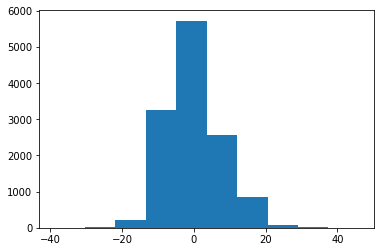

In [9]:
x = roto['audience_average']
y = roto['audience_percent']

regression = stats.linregress(x, y)

print("The slope of the regression line is : ", regression.slope)
print("The intercept of the regression line is : ", regression.intercept)
print("The p-value for regression line is :  ", regression.pvalue)

#calculate residual and draw histogram
roto['prediction'] = x *regression.slope + regression.intercept
roto['residual'] = y - roto['prediction']
print("The p value of the residual normaltest : ", stats.normaltest(roto['residual']).pvalue)
plt.hist(roto['residual'])
plt.show()

## OLS Test (critic_average vs critic_percent)

The slope of the regression line is :  17.804618295468
The intercept of the regression line is :  -46.06029734609654
The p-value for regression line is :   0.0
The p value of the residual normaltest :  8.895506760064173e-46


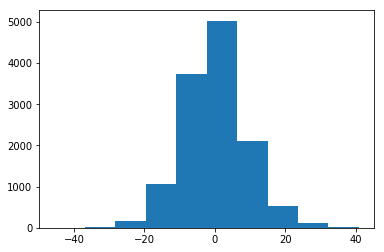

In [10]:
x = roto['critic_average']
y = roto['critic_percent']

regression = stats.linregress(x, y)

print("The slope of the regression line is : ", regression.slope)
print("The intercept of the regression line is : ", regression.intercept)
print("The p-value for regression line is :  ", regression.pvalue)

#calculate residual and draw histogram
roto['prediction'] = x *regression.slope + regression.intercept
roto['residual'] = y - roto['prediction']
print("The p value of the residual normaltest : ", stats.normaltest(roto['residual']).pvalue)
plt.hist(roto['residual'])
plt.show()

## Correlation Coefficient analysis of Profit and other variables

In [11]:
roto = roto.drop(columns = ['prediction','residual'])
wiki = pd.read_json('newwiki-movies.json.gz', orient='record', lines=True, encoding='utf-8')
wiki = wiki[['rotten_tomatoes_id','ncost','nbox','made_profit']]
data = pd.merge(wiki,roto, on = 'rotten_tomatoes_id', how = 'outer').dropna(how = 'any')
data['net_profit'] = data['nbox'] - data['ncost']
data = data.drop(columns = ['rotten_tomatoes_id','nbox','ncost'], axis = 1).reset_index(drop = True)
data

,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,net_profit
0,1.0,3.9,81.0,285168.0,7.0,75.0,6.600000e+07
1,0.0,3.4,69.0,20475.0,5.9,56.0,-6.000000e+06
2,1.0,3.9,90.0,903220.0,6.8,73.0,7.850000e+07
3,1.0,4.3,87.0,227740.0,8.2,93.0,1.823224e+09
4,1.0,3.2,57.0,121437.0,5.0,42.0,2.040000e+07
5,1.0,4.1,95.0,643985.0,8.5,97.0,4.628948e+06
6,1.0,4.0,93.0,1268686.0,8.4,93.0,9.234838e+08
7,1.0,3.4,72.0,599521.0,8.2,90.0,2.665892e+08
8,1.0,3.3,69.0,35796812.0,8.0,88.0,1.986772e+09
9,0.0,4.3,95.0,39909.0,9.0,100.0,-1.519487e+06


In [12]:
data.corr()

,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,net_profit
made_profit,1.000000,0.242538,0.252751,0.053212,0.229504,0.235938,0.284999
audience_average,0.242538,1.000000,0.891708,-0.049679,0.727871,0.718456,0.286353
audience_percent,0.252751,0.891708,1.000000,0.021353,0.796438,0.801182,0.216391
audience_ratings,0.053212,-0.049679,0.021353,1.000000,0.052599,0.047038,0.198709
critic_average,0.229504,0.727871,0.796438,0.052599,1.000000,0.964311,0.204812
critic_percent,0.235938,0.718456,0.801182,0.047038,0.964311,1.000000,0.200222
net_profit,0.284999,0.286353,0.216391,0.198709,0.204812,0.200222,1.000000
